In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#Imagenes para el entrenamiento
trains_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/train_val',
    validation_split=0.2,
    subset = "training",
    seed=123,
    image_size=(224,224)
)
#Imagenes para la validacion
val_ds = tf.keras.utils.image_dataset_from_directory(
     '/content/drive/MyDrive/dataset/train_val',
    validation_split=0.2,
    subset = "validation",
    seed=123,
    image_size=(224,224)
)

Found 8544 files belonging to 2 classes.
Using 6836 files for training.
Found 8544 files belonging to 2 classes.
Using 1708 files for validation.


In [ ]:
#Aqui podemos verificar cuales son las clases de nuestro dataset
class_names = trains_ds.class_names
print(class_names)

['benign', 'malignant']


In [ ]:
import tensorflow as tf

def calculate_class_distribution(dataset, class_names):
    # Extract labels from the dataset
    labels = tf.concat([y for _, y in dataset], axis=0)

    # Count occurrences of each class
    class_counts = tf.math.bincount(labels, minlength=len(class_names)).numpy()

    # Print total images and per-class distribution
    total_images = sum(class_counts)
    print(f"Total images: {total_images}")
    for idx, count in enumerate(class_counts):
        print(f"Images in class '{class_names[idx]}': {count} ({(count / total_images) * 100:.2f}%)")

In [ ]:
# Example usage
class_names = ['benign', 'malignant']
calculate_class_distribution(trains_ds, class_names)

Total images: 6836
Images in class 'benign': 2885 (42.20%)
Images in class 'malignant': 3951 (57.80%)


# Cargamos los modelos

In [ ]:
carga_modelo_cancer_2 = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_2.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-13412/400X/SOB_M_LC-14-13412-400-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_cancer_2.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Esta imagen parece ser malignant con un 86.80 % de exactitud.


In [ ]:
carga_modelo_cancer_3 = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_3.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_cancer_3.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
Esta imagen parece ser Benign con un 97.28 % de exactitud.


In [ ]:
carga_modelo_m = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_miau_1.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_m.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Esta imagen parece ser Benign con un 100.00 % de exactitud.


In [ ]:
carga_modelo_2_c = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_2_c.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_2_c.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Esta imagen parece ser Benign con un 100.00 % de exactitud.


In [ ]:
carga_modelo_fina = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_fina.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/malignas/SOB_M_DC-14-6241-200-002.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_fina.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Esta imagen parece ser Benign con un 100.00 % de exactitud.


In [ ]:
carga_modelo_trans = tf.keras.models.load_model('/content/drive/MyDrive/cancer_modelo_trans_1.h5')

In [ ]:
#Cargamos uuna imagen para realizar una prediccion
imagen_path = '/content/drive/MyDrive/malignas/SOB_M_PC-14-19440-200-006.png'
imagen = tf.keras.preprocessing.image.load_img(imagen_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(imagen)
input_arr = np.array([input_arr])
predictions = carga_modelo_trans.predict(input_arr)

#Imprimimos la prediccion
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
Esta imagen parece ser malignant con un 99.98 % de exactitud.


# Evaluacion de Modelos:

#Evaluacion modelo 2


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in val_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_cancer_2.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 750ms/step


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = np.argmax(predictions, axis=1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)

class_names = val_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.8533874660761027
F1-Score para la clase 'benign': 0.76
F1-Score para la clase 'malignant': 0.90


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1

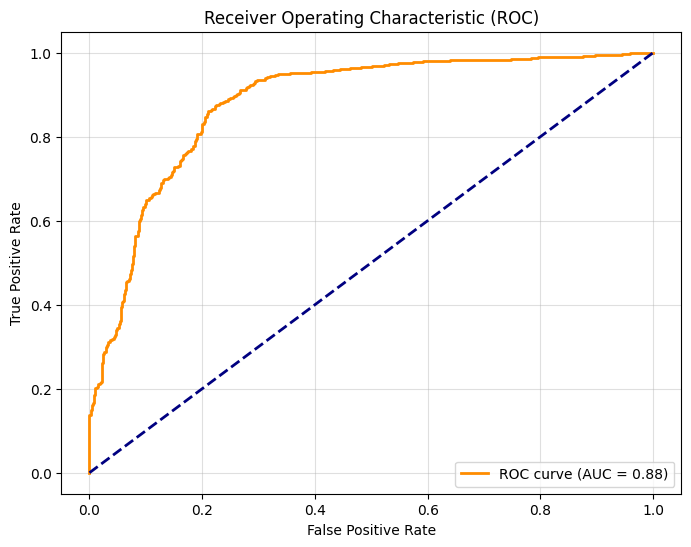

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_cancer_2.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions[:, 1])  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1

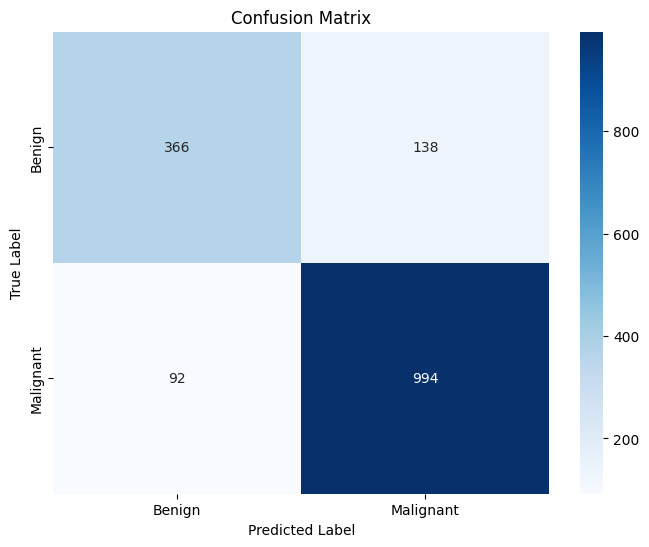

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener etiquetas verdaderas y predicciones
test_labels = []
predicted_labels = []

for images, labels in val_ds:  # Iterar sobre el dataset de validación o prueba
    test_labels.extend(labels.numpy())  # Convertir a array de NumPy
    predictions = carga_modelo_cancer_2.predict(images)
    # Change here: Remove flatten() and take argmax to get predicted class index
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Convertir a binario y a 1D

# Convertir las listas a arrays de NumPy
test_labels = np.array(test_labels)
predicted_labels = np.array(predicted_labels)

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
class_names = ["Benign", "Malignant"]  # Asegúrate de que coincide con las clases de tu modelo

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Evaluacion modelo 3

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in val_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_cancer_3.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = np.argmax(predictions, axis=1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)

class_names = test_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.8488934160473666
F1-Score para la clase 'benign': 0.76
F1-Score para la clase 'malignant': 0.89


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

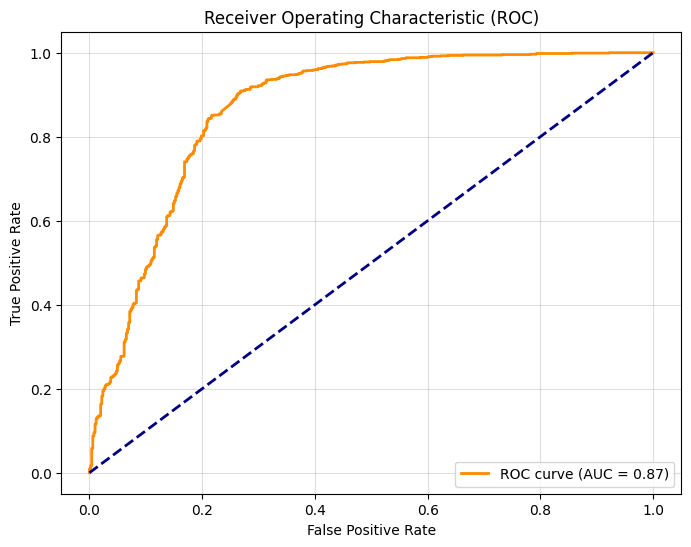

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_cancer_3.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions[:, 1])  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

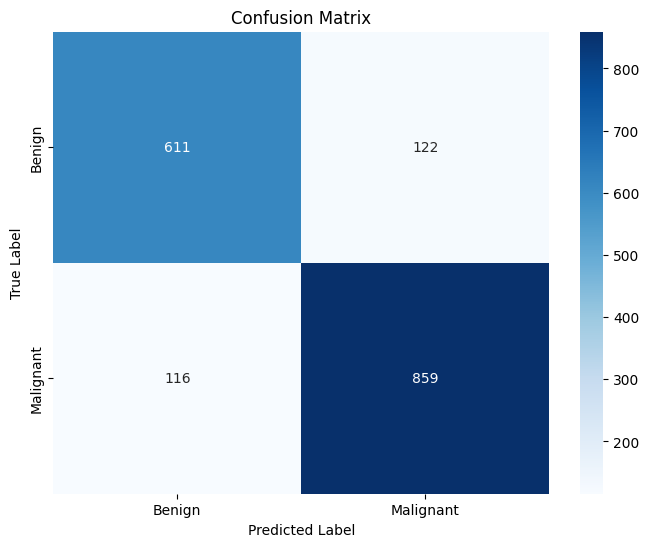

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener etiquetas verdaderas y predicciones
test_labels = []
predicted_labels = []

for images, labels in val_ds:  # Iterar sobre el dataset de validación o prueba
    test_labels.extend(labels.numpy())  # Convertir a array de NumPy
    predictions = carga_modelo_cancer_3.predict(images)
    # Change here: Remove flatten() and take argmax to get predicted class index
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Convertir a binario y a 1D

# Convertir las listas a arrays de NumPy
test_labels = np.array(test_labels)
predicted_labels = np.array(predicted_labels)

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
class_names = ["Benign", "Malignant"]  # Asegúrate de que coincide con las clases de tu modelo

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Pruebas modelo miau

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in val_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_m.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 996ms/step


In [ ]:
# Calcular el F1-score
# Convert predicted_labels to binary format by taking the argmax along axis 1
predicted_labels_binary = predicted_labels

# Now calculate the F1-score
f1 = f1_score(labels.numpy(), predicted_labels_binary)
print("F1-Score:", f1)

F1-Score: 0.8559139784946237


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

#Escribimos el f1 por clase:
print("F1-Score por clase:", f1_per_class)

class_names = val_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score por clase: [0.60818713 0.85591398]
F1-Score para la clase 'benign': 0.61
F1-Score para la clase 'malignant': 0.86


#Curva roc

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

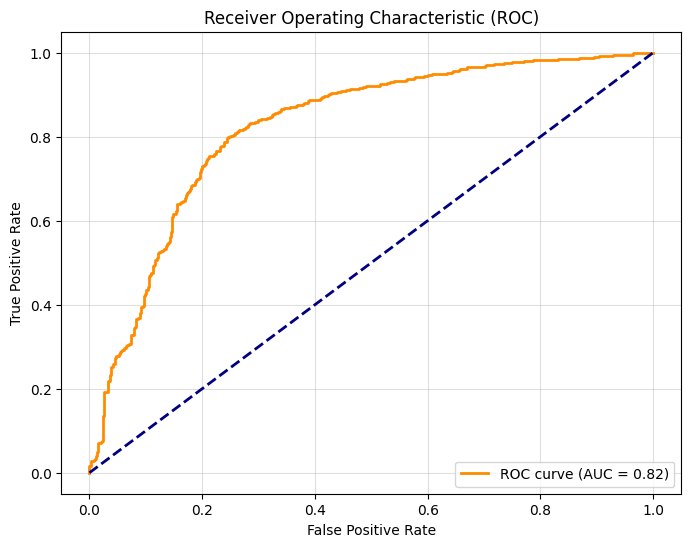

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_m.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions.flatten())  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

#Pruebas modelo 2 compilado diferente

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in val_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_2_c.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 749ms/step


In [ ]:
# Calcular el F1-score
# Convert predicted_labels to binary format by taking the argmax along axis 1
predicted_labels_binary = predicted_labels

# Now calculate the F1-score
f1 = f1_score(labels.numpy(), predicted_labels_binary)
print("F1-Score:", f1)

F1-Score: 0.8555347091932458


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

#Escribimos el f1 por clase:
print("F1-Score por clase:", f1_per_class)

class_names = val_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score por clase: [0.60818713 0.85591398]
F1-Score para la clase 'benign': 0.61
F1-Score para la clase 'malignant': 0.86


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

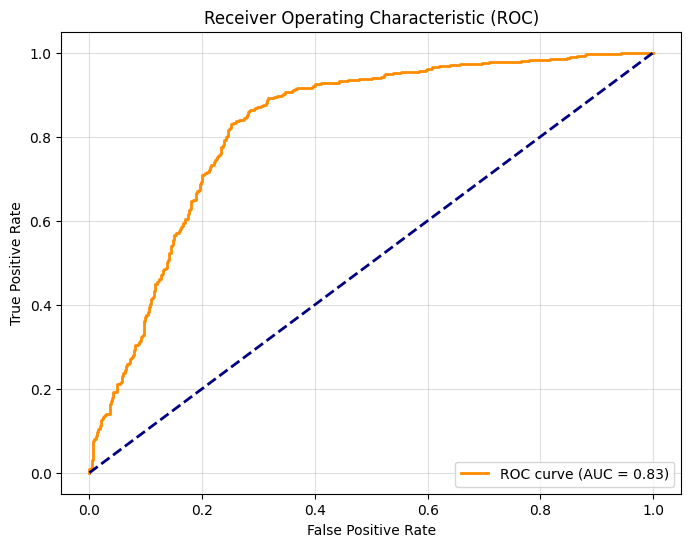

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_2_c.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions.flatten())  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

#Pruebas modelo final

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in val_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_fina.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 752ms/step


In [ ]:
# Calcular el F1-score
# Convert predicted_labels to binary format by taking the argmax along axis 1
predicted_labels_binary = predicted_labels

# Now calculate the F1-score
f1 = f1_score(labels.numpy(), predicted_labels_binary)
print("F1-Score:", f1)

F1-Score: 0.8415040456925273


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

#Escribimos el f1 por clase:
print("F1-Score por clase:", f1_per_class)

class_names = val_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score por clase: [0.69138091 0.84150405]
F1-Score para la clase 'benign': 0.69
F1-Score para la clase 'malignant': 0.84


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

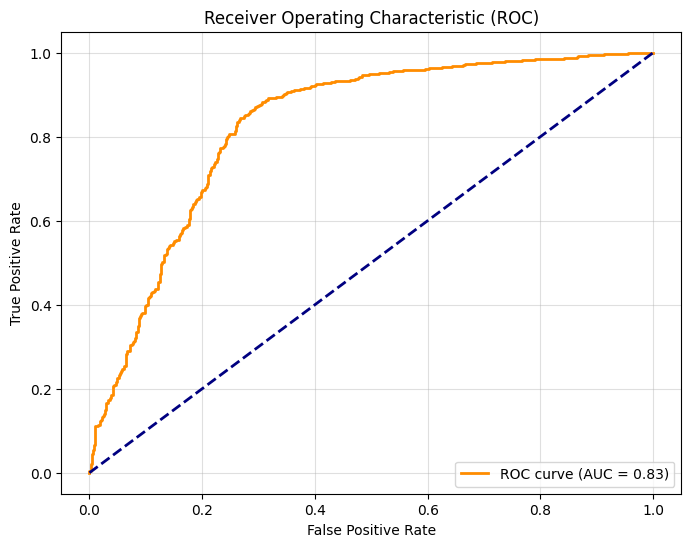

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Get predictions for the positive class (assuming binary classification)
    predictions = carga_modelo_fina.predict(images)
    # If your model outputs a single probability for the positive class, use:
    # y_pred.extend(predictions)
    # If your model outputs probabilities for multiple classes, use:
    y_pred.extend(predictions.flatten())  # Assuming the second column represents the positive class


y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

#Pruebas modelo con transferencia

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Obtener imágenes y etiquetas del conjunto de datos
images, labels = [], []
for img_batch, label_batch in val_ds:
    images.append(img_batch)
    labels.append(label_batch)

# Convertir a tensores
images = tf.concat(images, axis=0)
labels = tf.concat(labels, axis=0)

# Predecir con el modelo
predictions = carga_modelo_trans.predict(images)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

54/54 ━━━━━━━━━━━━━━━━━━━━ 347s 6s/step


In [ ]:
# Calcular el F1-score
# Convert predictions to binary format by choosing the class with the higher probability
predicted_labels_binary = np.argmax(predictions, axis=1)

# Now calculate the F1-score
f1_weighted = f1_score(labels.numpy(), predicted_labels_binary, average='weighted')

# F1-score para cada clase
f1_per_class = f1_score(labels.numpy(), predicted_labels_binary, average=None)

print("F1-Score (ponderado):", f1_weighted)

class_names = val_ds.class_names  # Si tienes nombres de clases del dataset
for i, f1 in enumerate(f1_per_class):
    print(f"F1-Score para la clase '{class_names[i]}': {f1:.2f}")

F1-Score (ponderado): 0.8957454649837822
F1-Score para la clase 'benign': 0.87
F1-Score para la clase 'malignant': 0.91


#Curva ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7

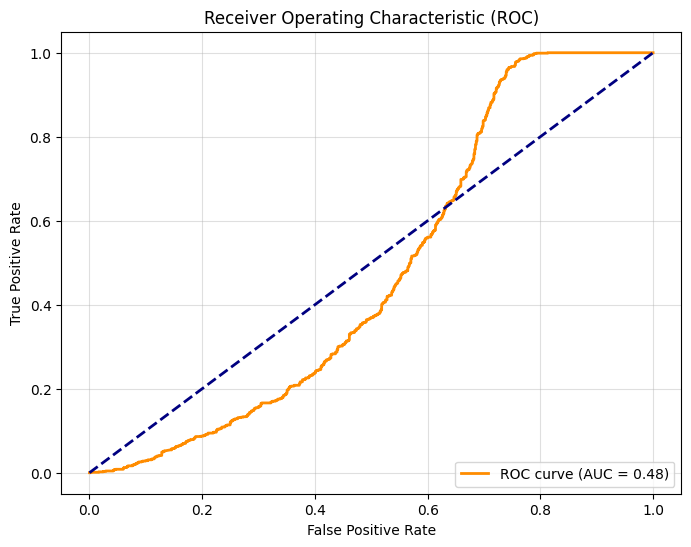

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Evaluar el modelo en el conjunto de prueba
y_true = []  # Etiquetas verdaderas
y_pred = []  # Probabilidades predichas

for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    # Predicciones de clase positiva (suponiendo que tu modelo es binario)
    predictions = carga_modelo_trans.predict(images)
    # Si el modelo tiene salida sigmoide (probabilidad de la clase positiva):
    y_pred.extend(predictions[:, 1])  # Asegúrate de que predicciones[:, 0] sea la probabilidad de clase positiva

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 

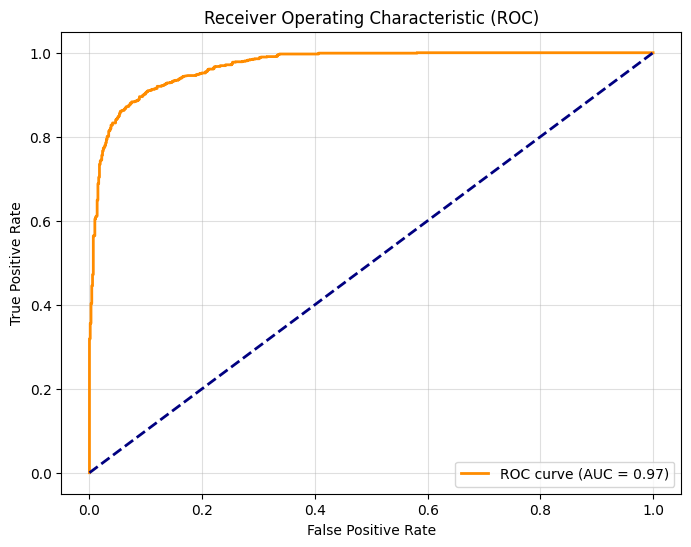

In [ ]:
from tensorflow.keras.activations import softmax

# Obtener etiquetas verdaderas y logits predichos
y_true = []
y_pred_logits = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Etiquetas verdaderas
    predictions = carga_modelo_trans.predict(images)  # Logits crudos
    y_pred_logits.extend(predictions)

y_true = np.array(y_true)
y_pred_logits = np.array(y_pred_logits)

# Convertir logits a probabilidades utilizando softmax
y_pred_probabilities = softmax(y_pred_logits).numpy()

# Usar la columna correspondiente a la clase positiva (por ejemplo, clase 1)
y_pred = y_pred_probabilities[:, 1]

# Calcular la curva ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()


# Matriz de confusión

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6

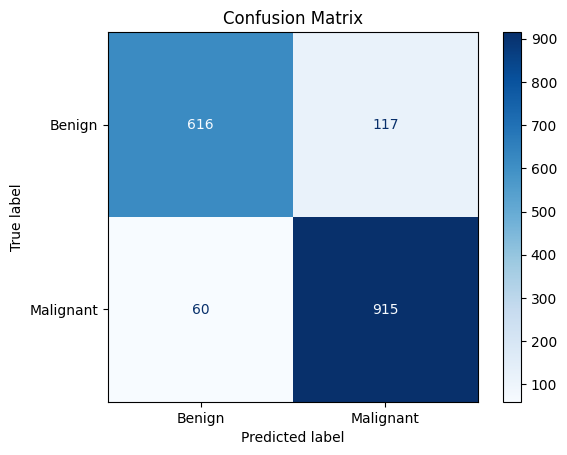

In [ ]:
from tensorflow.keras.activations import softmax
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Obtener etiquetas verdaderas y logits predichos
y_true = []  # Etiquetas reales
y_pred_logits = []  # Logits predichos

for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Convertir tensores a numpy
    predictions = carga_modelo_trans.predict(images)  # Logits crudos
    y_pred_logits.extend(predictions)

y_true = np.array(y_true)
y_pred_logits = np.array(y_pred_logits)

# Convertir logits a probabilidades usando softmax
y_pred_probabilities = softmax(y_pred_logits).numpy()

# Convertir probabilidades a clases predichas
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()
